## Red Wine Quality Prediction
### >This project aims at predicting the quality of the wine using some physicochemical properties of red wines such as acidity, sugar content, pH value, alcohol content, etc.The ‘quality’ column, rated by experts, serves as the target variable for predictive
### > We're going to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

### Let's import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data loading

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### EDA and Data Preprocessing

In [3]:
#overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#check and drop duplicates
df.duplicated().sum()

240

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
#statistical summary of the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Let's check the distribution of the columns to see if they are normal

Text(0.5, 1.0, 'Fixed acidity')

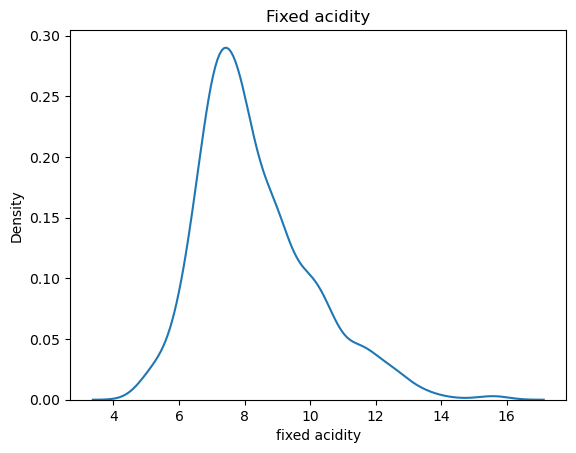

In [8]:
sns.kdeplot(x=df['fixed acidity'])
plt.title('Fixed acidity')

Text(0.5, 1.0, 'Volatile acidity')

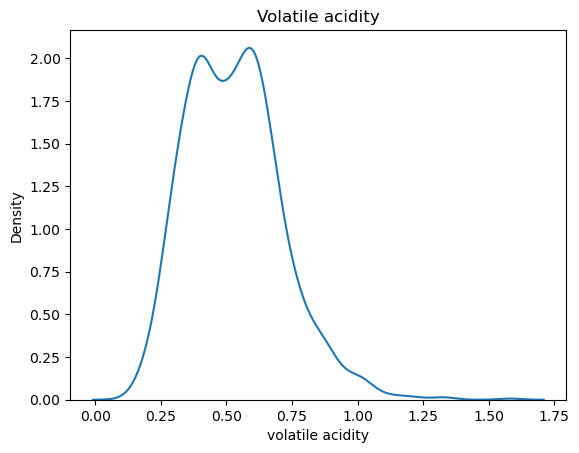

In [9]:
sns.kdeplot(x=df['volatile acidity'])
plt.title('Volatile acidity')

Text(0.5, 1.0, 'Citric Acid')

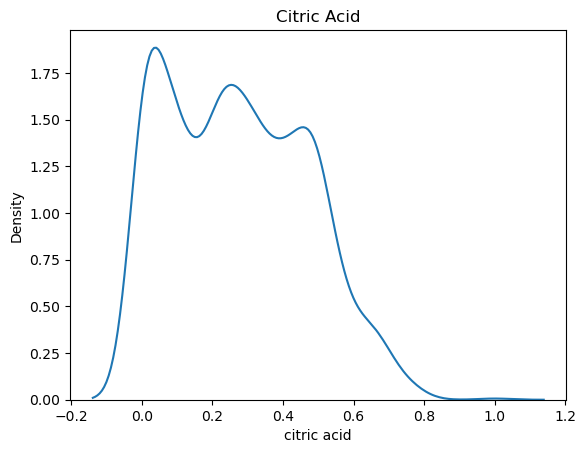

In [10]:
sns.kdeplot(x=df['citric acid'])
plt.title('Citric Acid')

Text(0.5, 1.0, 'Residual Sugar')

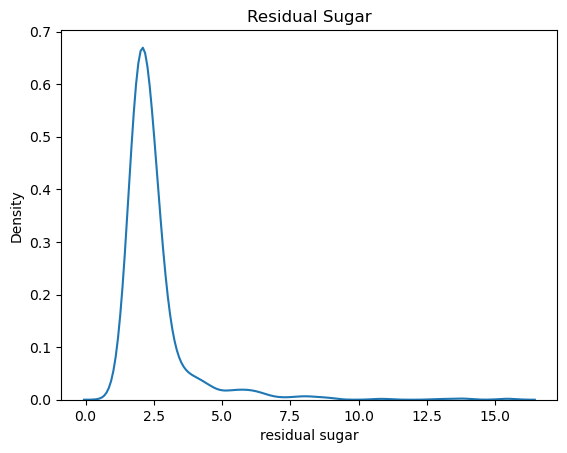

In [11]:
sns.kdeplot(x=df['residual sugar'])
plt.title('Residual Sugar')

<Axes: xlabel='residual sugar', ylabel='Count'>

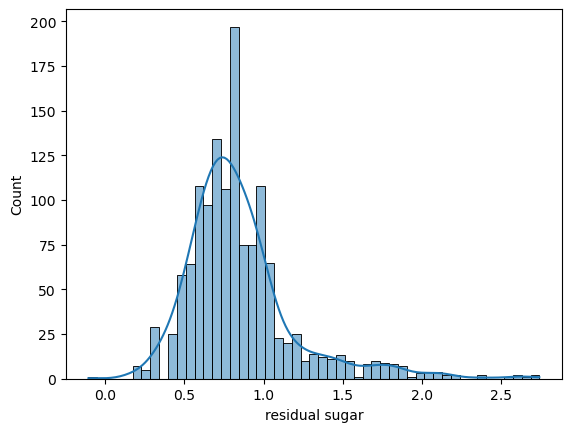

In [12]:
sns.histplot(x=np.log(df['residual sugar']),kde=True)

In [13]:
df['log_residual_sugar'] = np.log(df['residual sugar'])

### 'Free sulphure oxide' and 'Total sulphure oxide' are not normal so we need to transform them

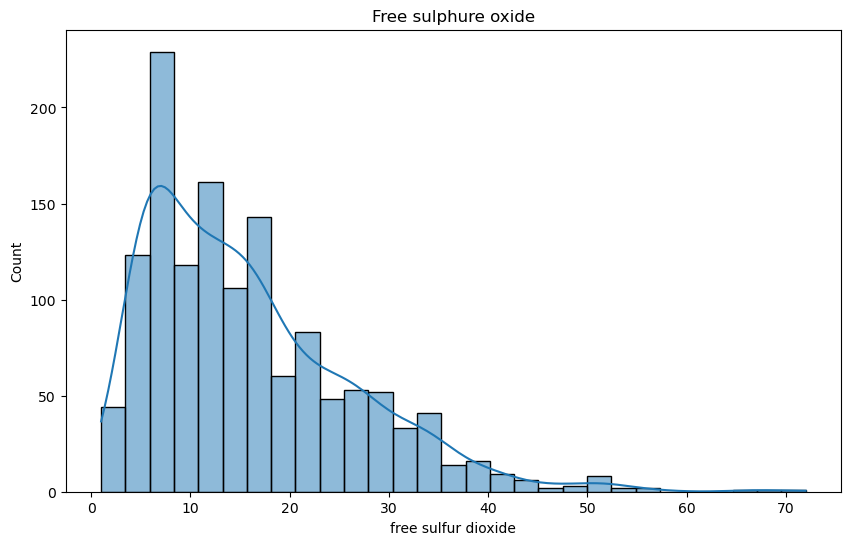

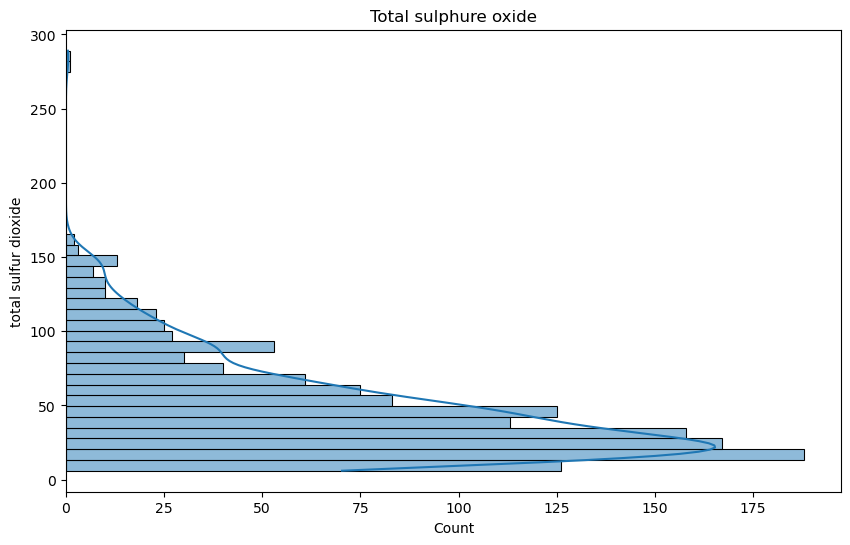

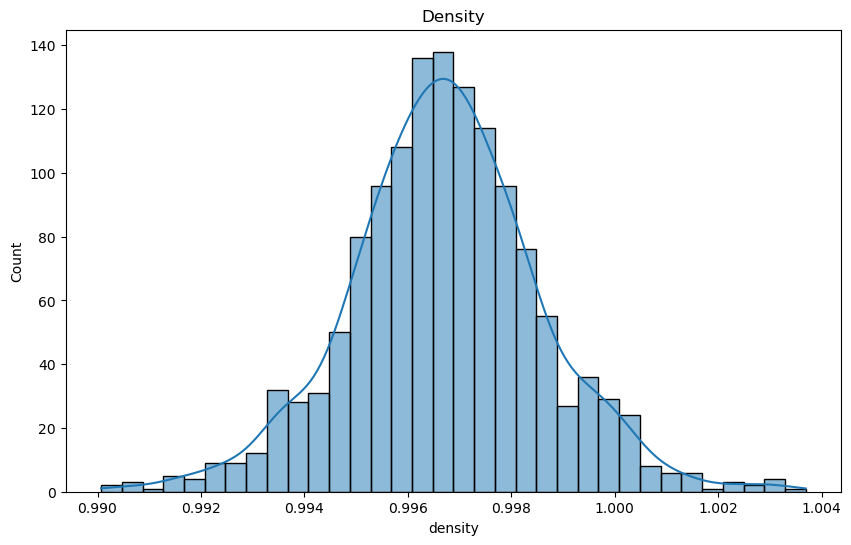

In [14]:

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['free sulfur dioxide'], kde=True)
plt.title('Free sulphure oxide')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.histplot(y=df['total sulfur dioxide'],kde=True)
plt.title('Total sulphure oxide')
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.histplot(x=df['density'],kde=True)
plt.title('Density')
plt.show()


### We can see that the plot for log tranform yields a normal distribution

<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

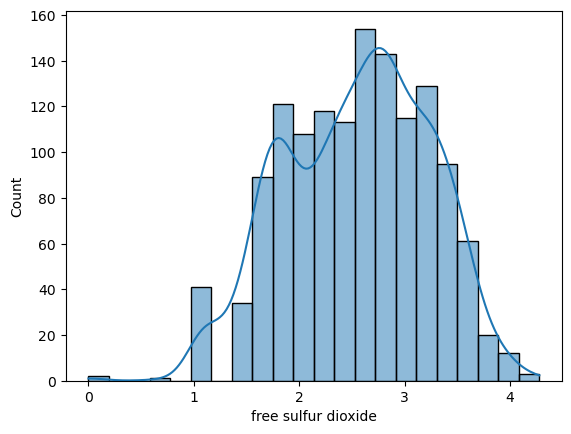

In [15]:
sns.histplot(np.log(df['free sulfur dioxide']), kde=True)

<Axes: xlabel='total sulfur dioxide', ylabel='Count'>

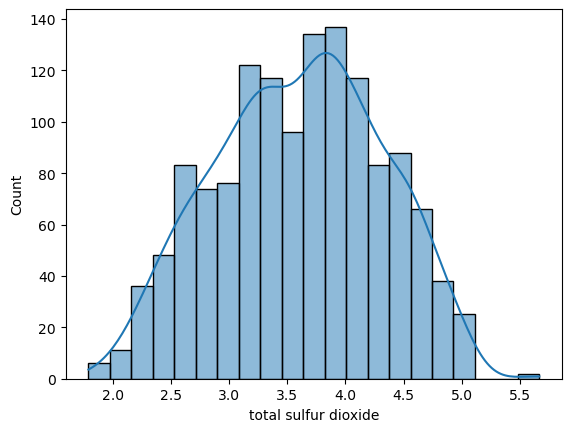

In [16]:
sns.histplot(np.log(df['total sulfur dioxide']), kde=True)

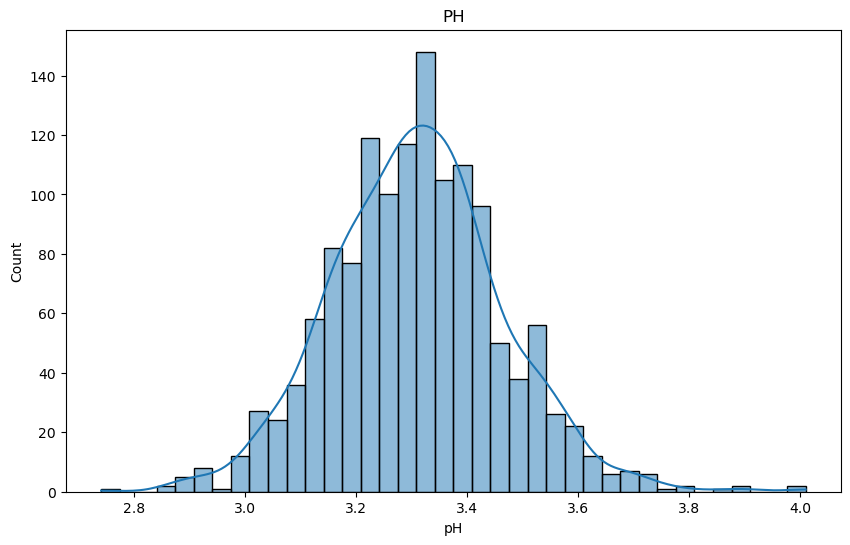

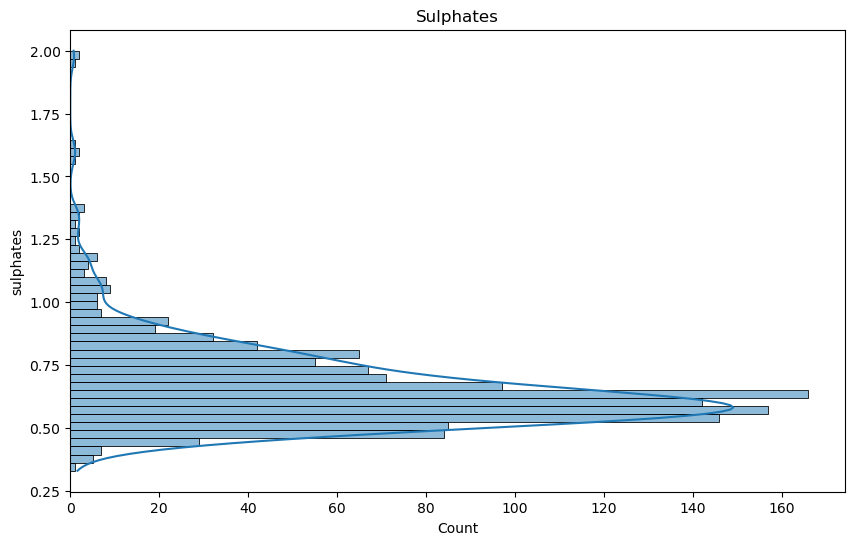

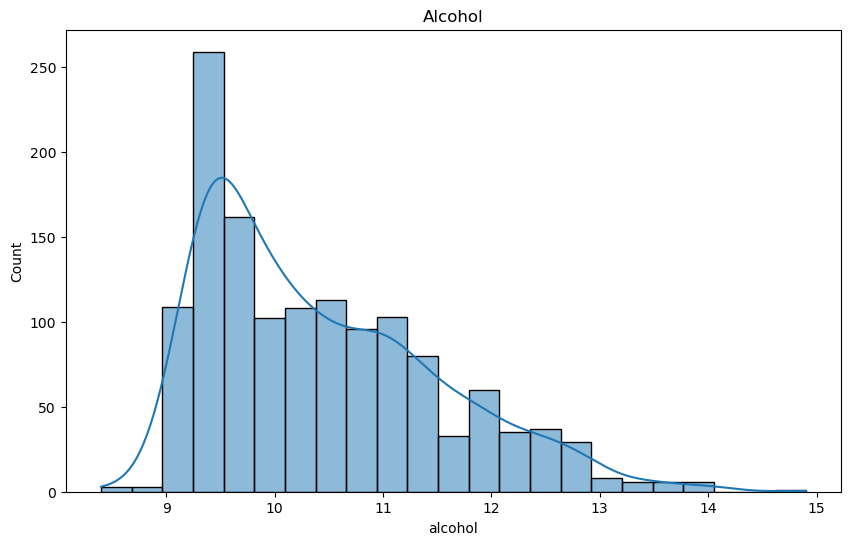

In [17]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['pH'], kde=True)
plt.title('PH')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.histplot(y=df['sulphates'],kde=True)
plt.title('Sulphates')
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.histplot(x=df['alcohol'],kde=True)
plt.title('Alcohol')
plt.show()


<Axes: xlabel='sulphates', ylabel='Count'>

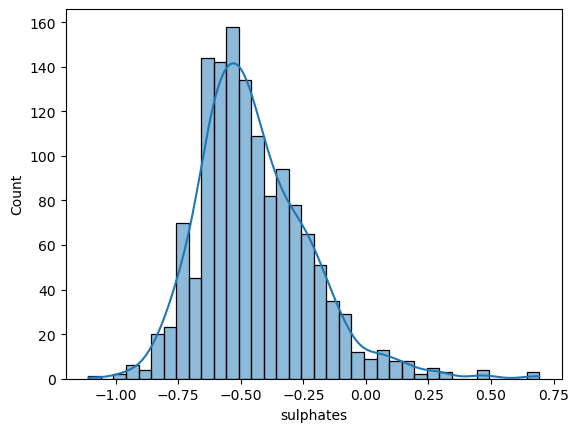

In [18]:
sns.histplot(np.log(df['sulphates']), kde=True)

In [19]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [20]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'log_residual_sugar'],
      dtype='object')

### Removing outliers from the data

In [21]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from all numerical columns
for column in cols:
    df = remove_outliers_iqr(df, column)

In [22]:
df.shape

(985, 13)

### Let's turn the problem to a classification task

In [23]:
def modify_quality(x):
    if x >= 6:
        return 1 #good
    else:
        return 0 #bad

In [24]:
df['quality'] = df['quality'].apply(modify_quality)

In [25]:
df.drop('log_residual_sugar',inplace=True,axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


<Axes: xlabel='quality', ylabel='count'>

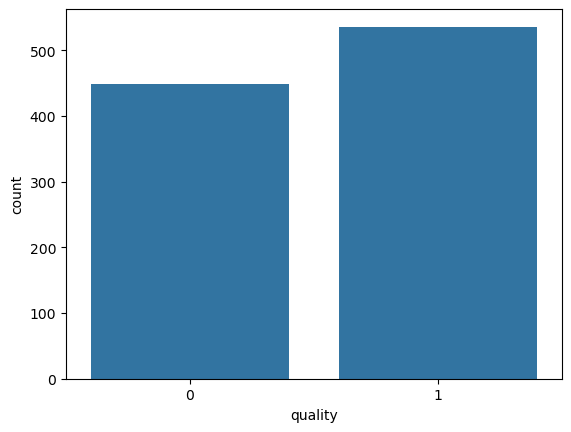

In [26]:
sns.countplot(x=df['quality'])

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


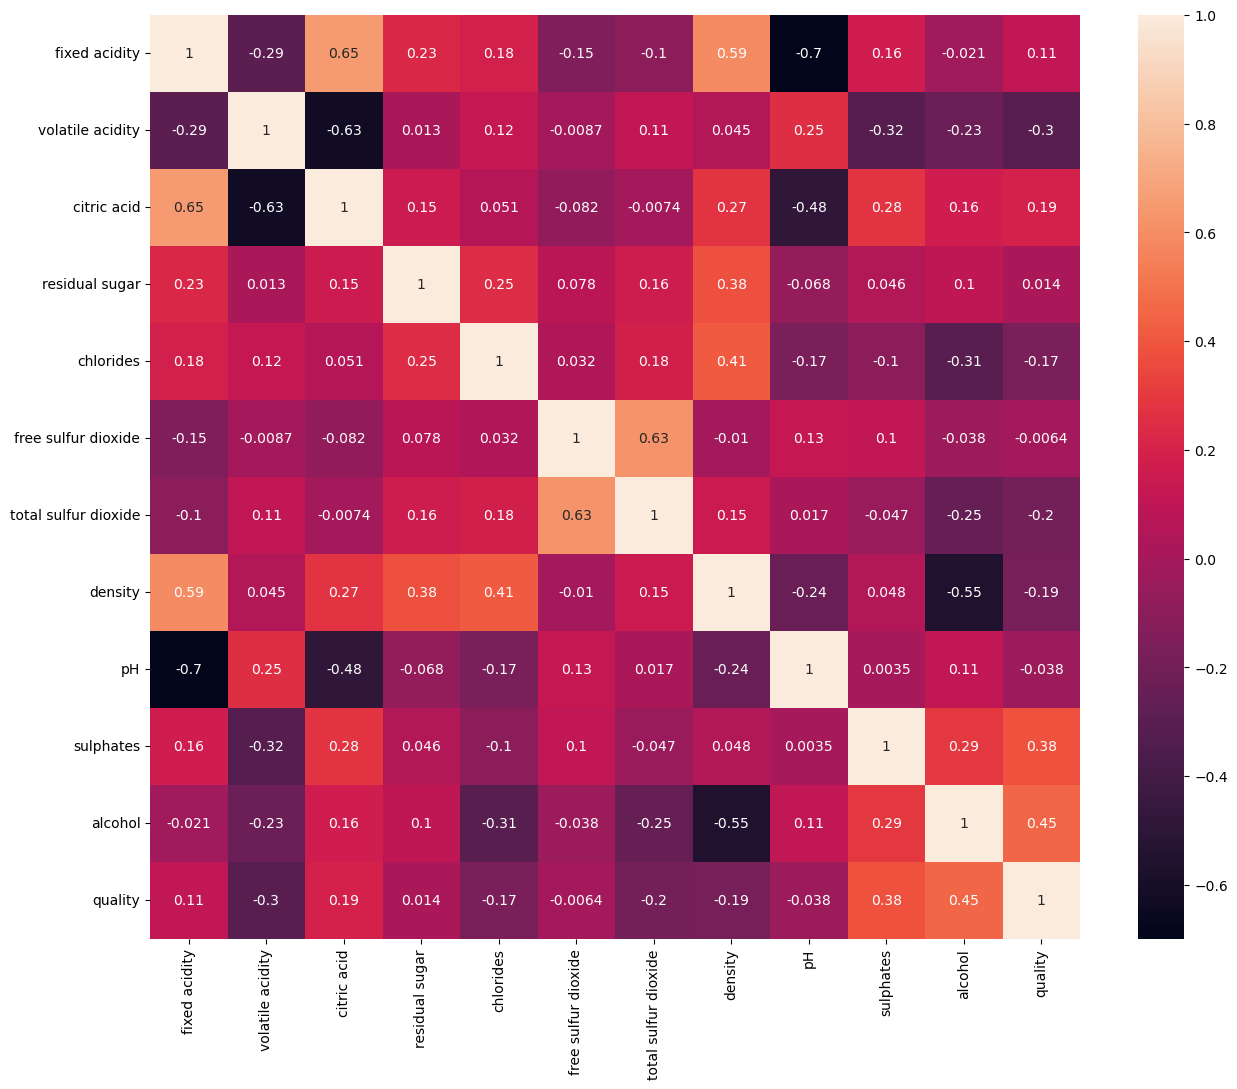

In [37]:
plt.figure(figsize=(15,12))
correlat = df.corr()
sns.heatmap(correlat,annot=True)
plt.show()


In [39]:
cor_target = abs(correlat['quality'])

In [43]:
selected_features = cor_target[cor_target > 0.15]
selected_features.index

Index(['volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide',
       'density', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [44]:
df1 = df[['volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide',
       'density', 'sulphates', 'alcohol', 'quality']]
df1.head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
1,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,0
2,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,0
3,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,1
5,0.66,0.00,0.075,40.0,0.9978,0.56,9.4,0


In [28]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest,mutual_info_classif


### Building a pipeline for scaling and power transformation

In [29]:
power_cols = ['residual sugar','free sulfur dioxide','total sulfur dioxide','sulphates']
scale_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
pw = PowerTransformer(method = 'yeo-johnson')
scaler = MinMaxScaler()
pw_pipeline = Pipeline(steps = [
    ('pw',PowerTransformer(method = 'yeo-johnson')),
])
scale_pipeline = Pipeline(steps = [
    ('scaler',MinMaxScaler())
])
preprocessor = ColumnTransformer([
    ('pw_pipeline',pw_pipeline,power_cols),
    ('scale_pipeline',scale_pipeline,scale_cols)
])

### Creating dependent and independent features

In [30]:
X = df.drop('quality',axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Fitting the preprocessor object

In [31]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### Building different models

In [32]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

In [33]:
report = {}
print('Modes Outcomes')
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Modes Outcomes
Learning rate set to 0.009049
0:	learn: 0.6893383	total: 370ms	remaining: 6m 9s
1:	learn: 0.6850788	total: 383ms	remaining: 3m 10s
2:	learn: 0.6817917	total: 395ms	remaining: 2m 11s
3:	learn: 0.6780868	total: 409ms	remaining: 1m 41s
4:	learn: 0.6742175	total: 421ms	remaining: 1m 23s
5:	learn: 0.6711761	total: 429ms	remaining: 1m 11s
6:	learn: 0.6681728	total: 438ms	remaining: 1m 2s
7:	learn: 0.6652173	total: 447ms	remaining: 55.4s
8:	learn: 0.6626787	total: 453ms	remaining: 49.9s
9:	learn: 0.6595722	total: 458ms	remaining: 45.4s
10:	learn: 0.6567210	total: 463ms	remaining: 41.7s
11:	learn: 0.6533639	total: 468ms	remaining: 38.5s
12:	learn: 0.6508952	total: 472ms	remaining: 35.8s
13:	learn: 0.6480208	total: 477ms	remaining: 33.6s
14:	learn: 0.6453580	total: 481ms	remaining: 31.6s
15:	learn: 0.6427542	total: 484ms	remaining: 29.8s
16:	learn: 0.6397491	total: 488ms	remaining: 28.2s
17:	learn: 0.6371196	total: 491ms	remaining: 26.8s
18:	learn: 0.6343479	total: 496ms	remainin

187:	learn: 0.4477928	total: 1.16s	remaining: 5s
188:	learn: 0.4474313	total: 1.16s	remaining: 4.99s
189:	learn: 0.4470271	total: 1.17s	remaining: 4.98s
190:	learn: 0.4466331	total: 1.17s	remaining: 4.96s
191:	learn: 0.4463977	total: 1.18s	remaining: 4.95s
192:	learn: 0.4460721	total: 1.18s	remaining: 4.93s
193:	learn: 0.4456716	total: 1.19s	remaining: 4.93s
194:	learn: 0.4452078	total: 1.19s	remaining: 4.92s
195:	learn: 0.4445624	total: 1.19s	remaining: 4.9s
196:	learn: 0.4437715	total: 1.2s	remaining: 4.89s
197:	learn: 0.4431921	total: 1.2s	remaining: 4.87s
198:	learn: 0.4424526	total: 1.21s	remaining: 4.85s
199:	learn: 0.4421562	total: 1.21s	remaining: 4.84s
200:	learn: 0.4415525	total: 1.21s	remaining: 4.83s
201:	learn: 0.4410887	total: 1.22s	remaining: 4.81s
202:	learn: 0.4407649	total: 1.22s	remaining: 4.8s
203:	learn: 0.4399304	total: 1.23s	remaining: 4.78s
204:	learn: 0.4394612	total: 1.23s	remaining: 4.77s
205:	learn: 0.4389039	total: 1.23s	remaining: 4.75s
206:	learn: 0.43855

390:	learn: 0.3721016	total: 1.96s	remaining: 3.05s
391:	learn: 0.3718538	total: 1.96s	remaining: 3.05s
392:	learn: 0.3715232	total: 1.97s	remaining: 3.04s
393:	learn: 0.3714398	total: 1.97s	remaining: 3.04s
394:	learn: 0.3712919	total: 1.98s	remaining: 3.03s
395:	learn: 0.3709738	total: 1.98s	remaining: 3.02s
396:	learn: 0.3705975	total: 1.99s	remaining: 3.02s
397:	learn: 0.3703064	total: 1.99s	remaining: 3.01s
398:	learn: 0.3699248	total: 1.99s	remaining: 3s
399:	learn: 0.3695649	total: 2s	remaining: 3s
400:	learn: 0.3693125	total: 2s	remaining: 2.99s
401:	learn: 0.3689284	total: 2s	remaining: 2.98s
402:	learn: 0.3686490	total: 2.01s	remaining: 2.98s
403:	learn: 0.3683381	total: 2.01s	remaining: 2.97s
404:	learn: 0.3679535	total: 2.02s	remaining: 2.96s
405:	learn: 0.3677910	total: 2.02s	remaining: 2.96s
406:	learn: 0.3675063	total: 2.02s	remaining: 2.95s
407:	learn: 0.3671652	total: 2.03s	remaining: 2.94s
408:	learn: 0.3671217	total: 2.03s	remaining: 2.93s
409:	learn: 0.3664953	total

585:	learn: 0.3273850	total: 2.74s	remaining: 1.94s
586:	learn: 0.3272352	total: 2.75s	remaining: 1.93s
587:	learn: 0.3269852	total: 2.75s	remaining: 1.93s
588:	learn: 0.3268582	total: 2.76s	remaining: 1.92s
589:	learn: 0.3266259	total: 2.76s	remaining: 1.92s
590:	learn: 0.3264680	total: 2.77s	remaining: 1.92s
591:	learn: 0.3261358	total: 2.77s	remaining: 1.91s
592:	learn: 0.3257536	total: 2.77s	remaining: 1.91s
593:	learn: 0.3251887	total: 2.78s	remaining: 1.9s
594:	learn: 0.3249267	total: 2.78s	remaining: 1.89s
595:	learn: 0.3247005	total: 2.79s	remaining: 1.89s
596:	learn: 0.3244885	total: 2.79s	remaining: 1.89s
597:	learn: 0.3243477	total: 2.8s	remaining: 1.88s
598:	learn: 0.3240005	total: 2.8s	remaining: 1.87s
599:	learn: 0.3236696	total: 2.8s	remaining: 1.87s
600:	learn: 0.3235023	total: 2.81s	remaining: 1.86s
601:	learn: 0.3231615	total: 2.81s	remaining: 1.86s
602:	learn: 0.3229223	total: 2.82s	remaining: 1.85s
603:	learn: 0.3228043	total: 2.82s	remaining: 1.85s
604:	learn: 0.32

774:	learn: 0.2853691	total: 3.54s	remaining: 1.03s
775:	learn: 0.2852574	total: 3.54s	remaining: 1.02s
776:	learn: 0.2850166	total: 3.54s	remaining: 1.02s
777:	learn: 0.2848488	total: 3.55s	remaining: 1.01s
778:	learn: 0.2847727	total: 3.55s	remaining: 1.01s
779:	learn: 0.2843974	total: 3.56s	remaining: 1s
780:	learn: 0.2840251	total: 3.56s	remaining: 999ms
781:	learn: 0.2837373	total: 3.57s	remaining: 994ms
782:	learn: 0.2834871	total: 3.57s	remaining: 990ms
783:	learn: 0.2833512	total: 3.57s	remaining: 985ms
784:	learn: 0.2830994	total: 3.58s	remaining: 980ms
785:	learn: 0.2827856	total: 3.58s	remaining: 976ms
786:	learn: 0.2826666	total: 3.59s	remaining: 971ms
787:	learn: 0.2824982	total: 3.59s	remaining: 967ms
788:	learn: 0.2820255	total: 3.6s	remaining: 962ms
789:	learn: 0.2815141	total: 3.6s	remaining: 957ms
790:	learn: 0.2812907	total: 3.6s	remaining: 953ms
791:	learn: 0.2811376	total: 3.61s	remaining: 948ms
792:	learn: 0.2810675	total: 3.61s	remaining: 943ms
793:	learn: 0.2807

965:	learn: 0.2459658	total: 4.33s	remaining: 152ms
966:	learn: 0.2458311	total: 4.33s	remaining: 148ms
967:	learn: 0.2456701	total: 4.34s	remaining: 143ms
968:	learn: 0.2455286	total: 4.34s	remaining: 139ms
969:	learn: 0.2453261	total: 4.35s	remaining: 134ms
970:	learn: 0.2450377	total: 4.35s	remaining: 130ms
971:	learn: 0.2447234	total: 4.36s	remaining: 125ms
972:	learn: 0.2446030	total: 4.36s	remaining: 121ms
973:	learn: 0.2442687	total: 4.37s	remaining: 117ms
974:	learn: 0.2440792	total: 4.37s	remaining: 112ms
975:	learn: 0.2438968	total: 4.37s	remaining: 108ms
976:	learn: 0.2436949	total: 4.38s	remaining: 103ms
977:	learn: 0.2435323	total: 4.38s	remaining: 98.6ms
978:	learn: 0.2434483	total: 4.38s	remaining: 94.1ms
979:	learn: 0.2432801	total: 4.39s	remaining: 89.6ms
980:	learn: 0.2429139	total: 4.39s	remaining: 85.1ms
981:	learn: 0.2427077	total: 4.4s	remaining: 80.6ms
982:	learn: 0.2425176	total: 4.4s	remaining: 76.1ms
983:	learn: 0.2422143	total: 4.4s	remaining: 71.6ms
984:	lea

In [34]:
classifier = models[best_model_name]

### Let's see if we can perform feature selection on the data, the accuracies are almost the same

In [35]:
accuracy_list = []
for i in range(1,12):
    selector = SelectKBest(mutual_info_classif,k=i)
    selector.fit(X_train,y_train)
    sel_X_train = selector.transform(X_train)
    sel_X_test = selector.transform(X_test)
    classifier.fit(sel_X_train,y_train)
    preds = classifier.predict(sel_X_test)
    acc = accuracy_score(y_test,preds)
    accuracy_list.append(acc)
    
print(accuracy_list)

[0.7611336032388664, 0.7611336032388664, 0.7692307692307693, 0.7530364372469636, 0.7530364372469636, 0.7611336032388664, 0.7530364372469636, 0.757085020242915, 0.7651821862348178, 0.7732793522267206, 0.7692307692307693]


### Saving the model and preprocessor

In [45]:
X_sel = df1.drop('quality',axis=1)
y_sel = df1['quality']
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y_sel, test_size=0.25, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_train_sel = scaler1.fit_transform(X_train_sel)
X_test_sel = scaler1.transform(X_test_sel)

In [48]:
report = {}
print('Modes Outcomes')
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_sel,y_train_sel)
    prediction = model.predict(X_test_sel)
    score = accuracy_score(y_test_sel,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Modes Outcomes
Learning rate set to 0.009049
0:	learn: 0.6898713	total: 29.1ms	remaining: 29s
1:	learn: 0.6866604	total: 42ms	remaining: 21s
2:	learn: 0.6835193	total: 50.1ms	remaining: 16.6s
3:	learn: 0.6795795	total: 57.3ms	remaining: 14.3s
4:	learn: 0.6759501	total: 62.1ms	remaining: 12.4s
5:	learn: 0.6725892	total: 66.8ms	remaining: 11.1s
6:	learn: 0.6693295	total: 72.5ms	remaining: 10.3s
7:	learn: 0.6656378	total: 77ms	remaining: 9.55s
8:	learn: 0.6629849	total: 81.5ms	remaining: 8.97s
9:	learn: 0.6599587	total: 86.5ms	remaining: 8.57s
10:	learn: 0.6569338	total: 91.2ms	remaining: 8.2s
11:	learn: 0.6540320	total: 95.9ms	remaining: 7.9s
12:	learn: 0.6512131	total: 101ms	remaining: 7.67s
13:	learn: 0.6478453	total: 106ms	remaining: 7.47s
14:	learn: 0.6450330	total: 111ms	remaining: 7.28s
15:	learn: 0.6425789	total: 116ms	remaining: 7.11s
16:	learn: 0.6397456	total: 120ms	remaining: 6.93s
17:	learn: 0.6371272	total: 123ms	remaining: 6.73s
18:	learn: 0.6344406	total: 127ms	remaining: 

172:	learn: 0.4585532	total: 734ms	remaining: 3.51s
173:	learn: 0.4581677	total: 741ms	remaining: 3.52s
174:	learn: 0.4577942	total: 744ms	remaining: 3.51s
175:	learn: 0.4575010	total: 750ms	remaining: 3.51s
176:	learn: 0.4570319	total: 754ms	remaining: 3.51s
177:	learn: 0.4565415	total: 759ms	remaining: 3.5s
178:	learn: 0.4560289	total: 763ms	remaining: 3.5s
179:	learn: 0.4552845	total: 768ms	remaining: 3.5s
180:	learn: 0.4546835	total: 772ms	remaining: 3.5s
181:	learn: 0.4538381	total: 776ms	remaining: 3.49s
182:	learn: 0.4532916	total: 783ms	remaining: 3.49s
183:	learn: 0.4526230	total: 787ms	remaining: 3.49s
184:	learn: 0.4520140	total: 791ms	remaining: 3.48s
185:	learn: 0.4513398	total: 796ms	remaining: 3.48s
186:	learn: 0.4507949	total: 800ms	remaining: 3.48s
187:	learn: 0.4502104	total: 804ms	remaining: 3.47s
188:	learn: 0.4495343	total: 808ms	remaining: 3.47s
189:	learn: 0.4489525	total: 813ms	remaining: 3.47s
190:	learn: 0.4485962	total: 818ms	remaining: 3.46s
191:	learn: 0.44

368:	learn: 0.3904576	total: 1.52s	remaining: 2.61s
369:	learn: 0.3902977	total: 1.53s	remaining: 2.6s
370:	learn: 0.3901109	total: 1.53s	remaining: 2.6s
371:	learn: 0.3897138	total: 1.54s	remaining: 2.6s
372:	learn: 0.3894946	total: 1.54s	remaining: 2.59s
373:	learn: 0.3891309	total: 1.54s	remaining: 2.58s
374:	learn: 0.3889024	total: 1.55s	remaining: 2.59s
375:	learn: 0.3885066	total: 1.55s	remaining: 2.58s
376:	learn: 0.3879647	total: 1.56s	remaining: 2.58s
377:	learn: 0.3875587	total: 1.56s	remaining: 2.58s
378:	learn: 0.3872359	total: 1.57s	remaining: 2.57s
379:	learn: 0.3870662	total: 1.57s	remaining: 2.57s
380:	learn: 0.3868463	total: 1.58s	remaining: 2.56s
381:	learn: 0.3864070	total: 1.58s	remaining: 2.56s
382:	learn: 0.3860988	total: 1.58s	remaining: 2.55s
383:	learn: 0.3858492	total: 1.59s	remaining: 2.55s
384:	learn: 0.3855879	total: 1.59s	remaining: 2.54s
385:	learn: 0.3854279	total: 1.59s	remaining: 2.54s
386:	learn: 0.3852332	total: 1.6s	remaining: 2.53s
387:	learn: 0.38

560:	learn: 0.3464419	total: 2.33s	remaining: 1.82s
561:	learn: 0.3459560	total: 2.33s	remaining: 1.82s
562:	learn: 0.3458541	total: 2.33s	remaining: 1.81s
563:	learn: 0.3456318	total: 2.34s	remaining: 1.81s
564:	learn: 0.3453663	total: 2.35s	remaining: 1.8s
565:	learn: 0.3451916	total: 2.35s	remaining: 1.8s
566:	learn: 0.3450179	total: 2.35s	remaining: 1.8s
567:	learn: 0.3446713	total: 2.36s	remaining: 1.79s
568:	learn: 0.3445721	total: 2.36s	remaining: 1.79s
569:	learn: 0.3443609	total: 2.37s	remaining: 1.79s
570:	learn: 0.3438529	total: 2.37s	remaining: 1.78s
571:	learn: 0.3436841	total: 2.38s	remaining: 1.78s
572:	learn: 0.3433249	total: 2.38s	remaining: 1.77s
573:	learn: 0.3431702	total: 2.39s	remaining: 1.77s
574:	learn: 0.3429586	total: 2.39s	remaining: 1.77s
575:	learn: 0.3426539	total: 2.4s	remaining: 1.76s
576:	learn: 0.3424579	total: 2.4s	remaining: 1.76s
577:	learn: 0.3422436	total: 2.41s	remaining: 1.76s
578:	learn: 0.3420894	total: 2.41s	remaining: 1.75s
579:	learn: 0.342

731:	learn: 0.3127077	total: 3.13s	remaining: 1.15s
732:	learn: 0.3126702	total: 3.14s	remaining: 1.14s
733:	learn: 0.3124347	total: 3.15s	remaining: 1.14s
734:	learn: 0.3122736	total: 3.15s	remaining: 1.14s
735:	learn: 0.3120768	total: 3.15s	remaining: 1.13s
736:	learn: 0.3119176	total: 3.16s	remaining: 1.13s
737:	learn: 0.3116670	total: 3.17s	remaining: 1.12s
738:	learn: 0.3114004	total: 3.17s	remaining: 1.12s
739:	learn: 0.3110869	total: 3.18s	remaining: 1.12s
740:	learn: 0.3109850	total: 3.19s	remaining: 1.11s
741:	learn: 0.3107483	total: 3.2s	remaining: 1.11s
742:	learn: 0.3104526	total: 3.21s	remaining: 1.11s
743:	learn: 0.3101364	total: 3.21s	remaining: 1.1s
744:	learn: 0.3099054	total: 3.21s	remaining: 1.1s
745:	learn: 0.3097906	total: 3.23s	remaining: 1.1s
746:	learn: 0.3096458	total: 3.23s	remaining: 1.09s
747:	learn: 0.3093658	total: 3.24s	remaining: 1.09s
748:	learn: 0.3091803	total: 3.24s	remaining: 1.09s
749:	learn: 0.3090417	total: 3.25s	remaining: 1.08s
750:	learn: 0.30

907:	learn: 0.2795518	total: 3.93s	remaining: 398ms
908:	learn: 0.2792594	total: 3.93s	remaining: 393ms
909:	learn: 0.2792203	total: 3.93s	remaining: 389ms
910:	learn: 0.2789081	total: 3.94s	remaining: 385ms
911:	learn: 0.2786569	total: 3.94s	remaining: 380ms
912:	learn: 0.2784689	total: 3.95s	remaining: 376ms
913:	learn: 0.2784040	total: 3.95s	remaining: 372ms
914:	learn: 0.2782501	total: 3.96s	remaining: 367ms
915:	learn: 0.2782329	total: 3.98s	remaining: 365ms
916:	learn: 0.2781228	total: 3.99s	remaining: 361ms
917:	learn: 0.2778766	total: 4s	remaining: 357ms
918:	learn: 0.2777107	total: 4s	remaining: 353ms
919:	learn: 0.2776139	total: 4s	remaining: 348ms
920:	learn: 0.2775856	total: 4.01s	remaining: 344ms
921:	learn: 0.2775056	total: 4.01s	remaining: 339ms
922:	learn: 0.2772763	total: 4.01s	remaining: 335ms
923:	learn: 0.2770635	total: 4.02s	remaining: 330ms
924:	learn: 0.2769503	total: 4.02s	remaining: 326ms
925:	learn: 0.2768612	total: 4.02s	remaining: 322ms
926:	learn: 0.2766993

### selected featuress [''volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide','density', 'sulphates', 'alcohol'

In [50]:
logistic = models[best_model_name]
import pickle
data = {'model':logistic,'scaler':scaler1}
with open('wine.pkl','wb') as file:
    pickle.dump(data,file)